In [1568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## READ THE DATA

In [1569]:
input=pd.read_csv("day.csv")

In [1570]:
input.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1571]:
input.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1572]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1573]:
input.shape

(730, 16)

In [1574]:
# Code block to check how much Null Data is present.
100 * input.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [1575]:
# Checking for duplicates and dropping the entire duplicate row if any
input_dup=input
input_dup.drop_duplicates(subset=None,inplace=True)
print(input_dup.shape)
print(input.shape)

(730, 16)
(730, 16)


In [1576]:
input.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)
input.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1577]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

input.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
input.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [1578]:
# Encoding/mapping the season column
input.season = input.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding/mapping the month column
input.month = input.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the weekday column
input.weekday = input.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Encoding/mapping the weathersit column
input.weathersit = input.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

## Visualization of Categorical Variables

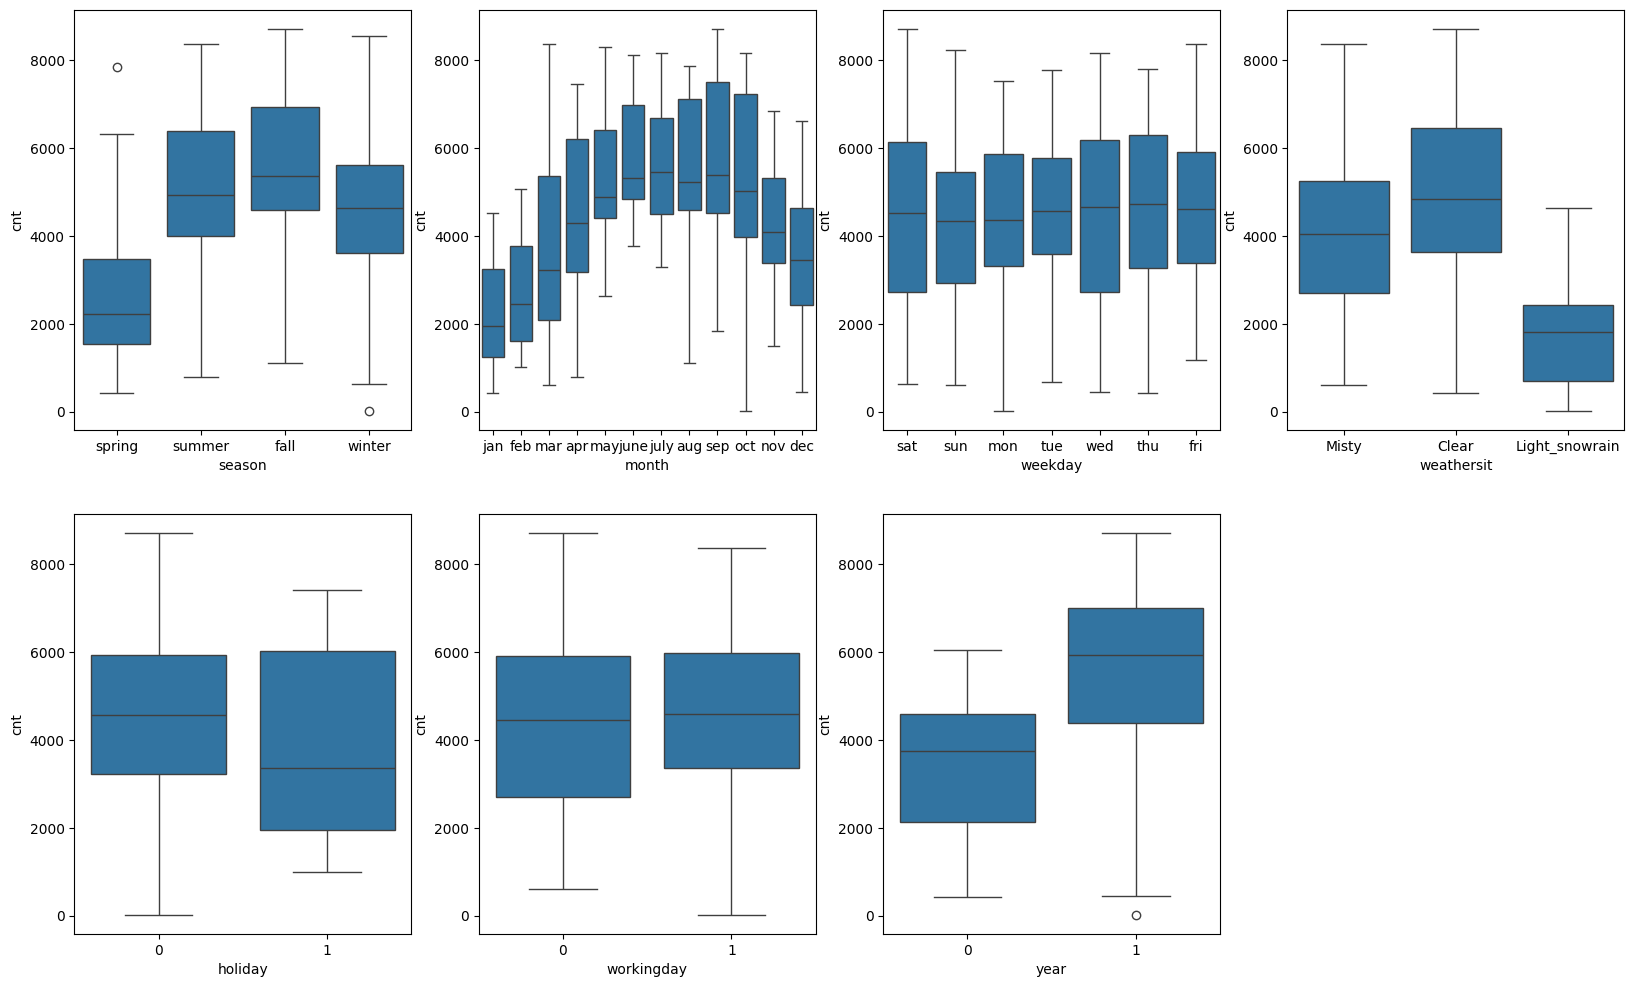

In [1579]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = input)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = input)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = input)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = input)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = input)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = input)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = input)
plt.show()

In [1580]:
## Categorical Variables = season, holiday, year, weekday, workingday, weathersit

def plot_cat_columns(columns):
    num_plots = len(columns)
    plt.figure(figsize=(14, 6 * num_plots))  # Adjust figsize based on number of plots
    
    for i, column in enumerate(columns, start=1):
        plt.subplot(num_plots, 2, 2*i - 1)
        sns.barplot(
            data=input,
            x=column,
            y='cnt',
        )
        plt.title(f'Bar Plot of Count by {column.capitalize()}', fontsize=14, weight='bold')
        plt.xlabel(column.capitalize(), fontsize=8)
        plt.ylabel('Count', fontsize=8)
        plt.legend(title='Year', labels=['2018', '2019'], fontsize=8, title_fontsize=12)

        plt.subplot(num_plots, 2, 2*i)
        sns.barplot(x=column, y='cnt', data=input, hue='year', palette='Set1')
        plt.title(f'Bar Plot of Count by {column.capitalize()}', fontsize=14, weight='bold')
        plt.xlabel(column.capitalize(), fontsize=8)
        plt.ylabel('Count', fontsize=8)
        plt.legend(title='Year', labels=['2018', '2019'], fontsize=8, title_fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.7)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

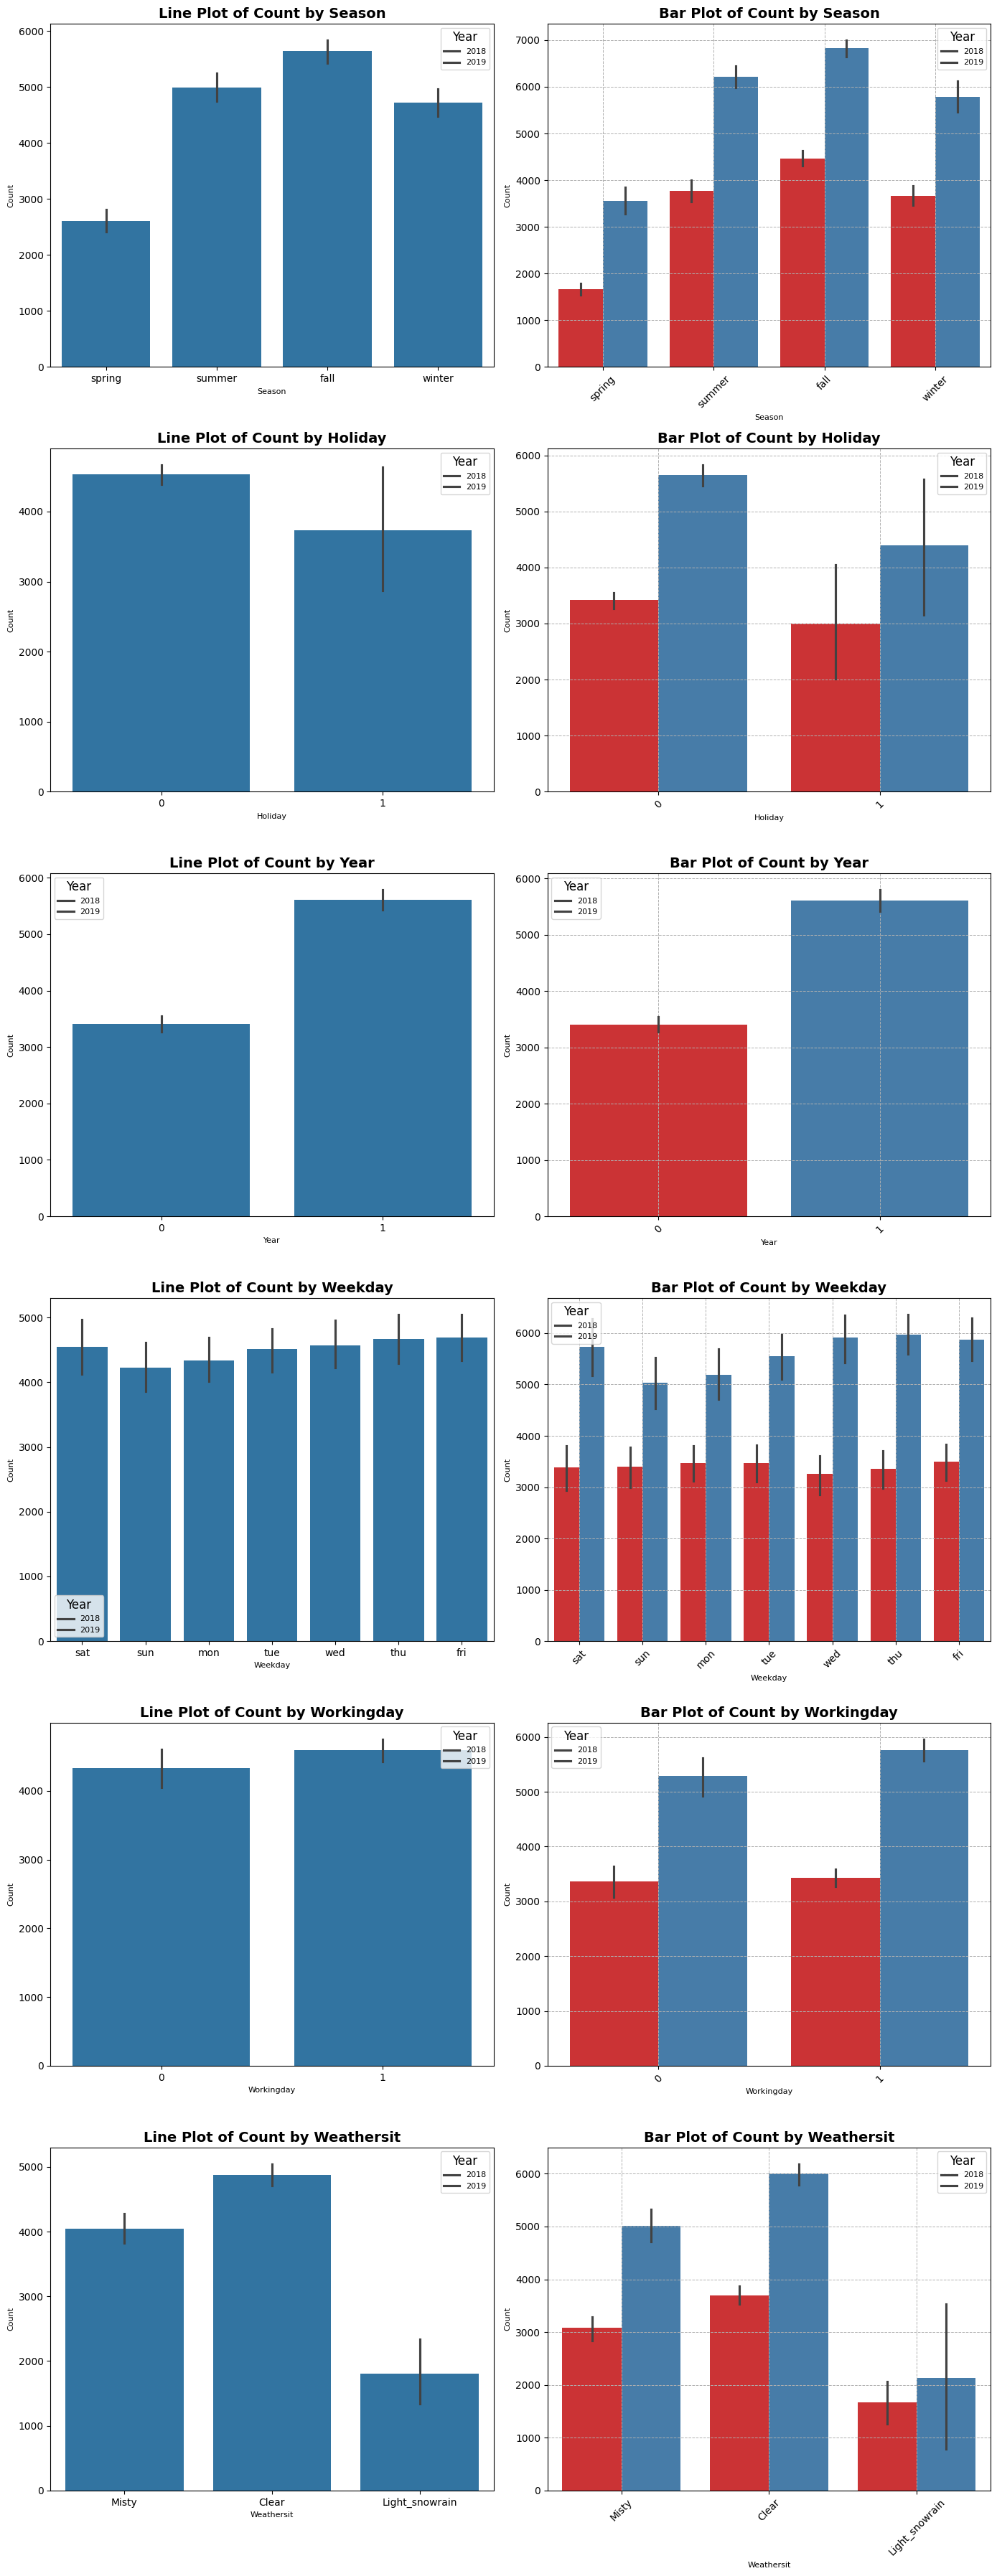

In [1581]:
categorical_columns=['season', 'holiday', 'year','weekday', 'workingday', 'weathersit']
plot_cat_columns(categorical_columns)

### Insights
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Visualization of Numerical Variables

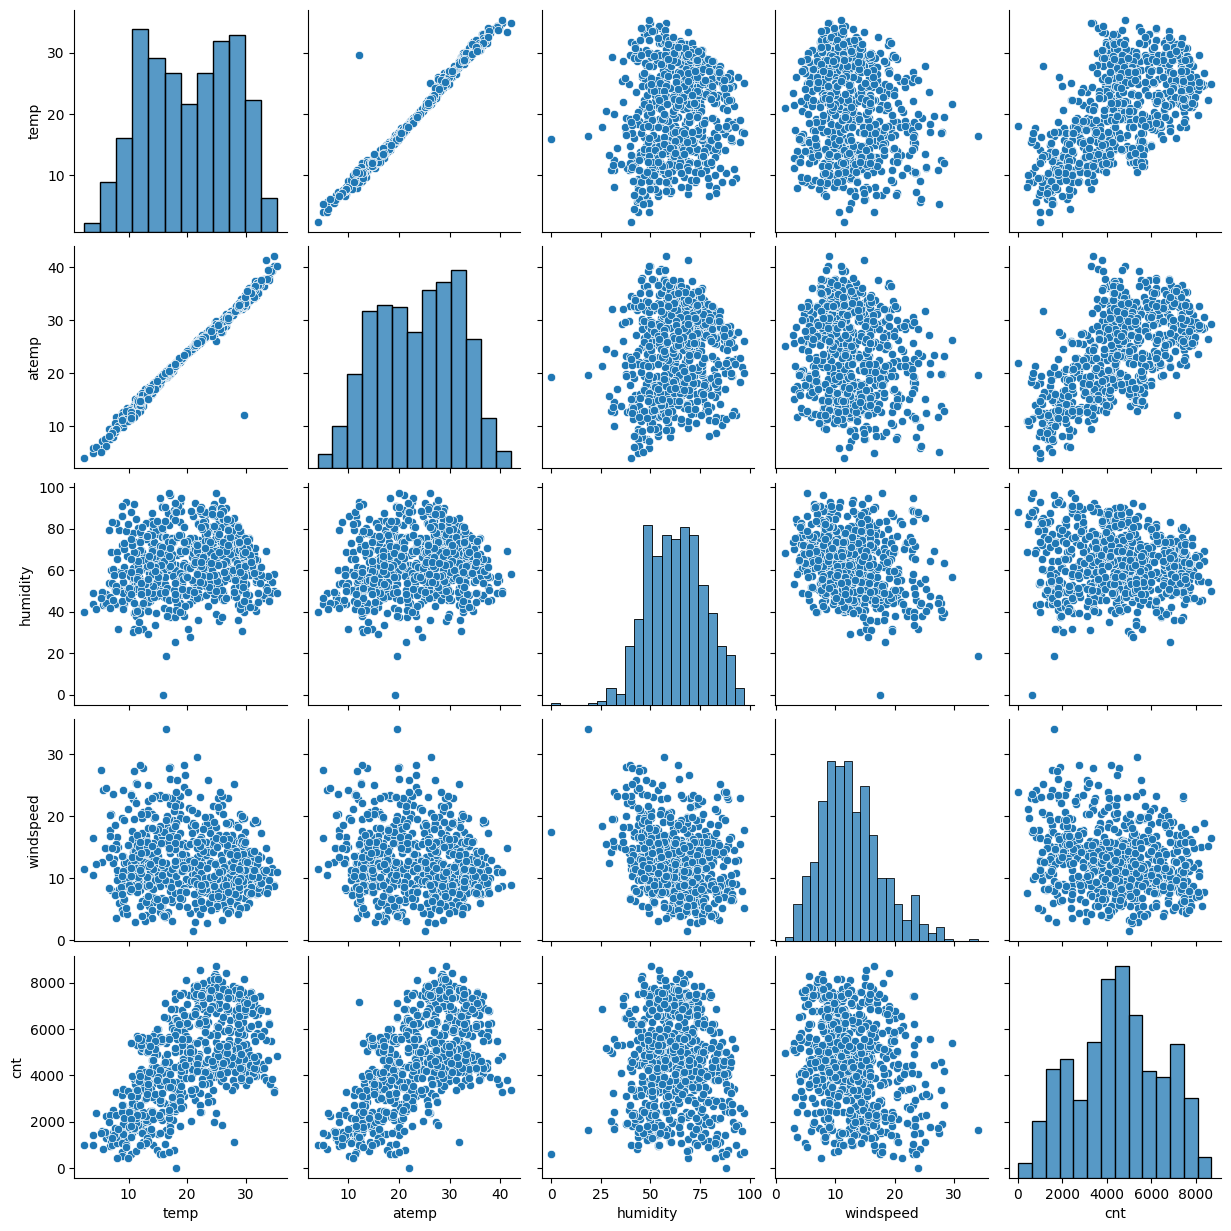

In [1582]:
numerical_columns=['temp','atemp','humidity','windspeed','cnt']
sns.pairplot(input,vars=numerical_columns)
plt.show()

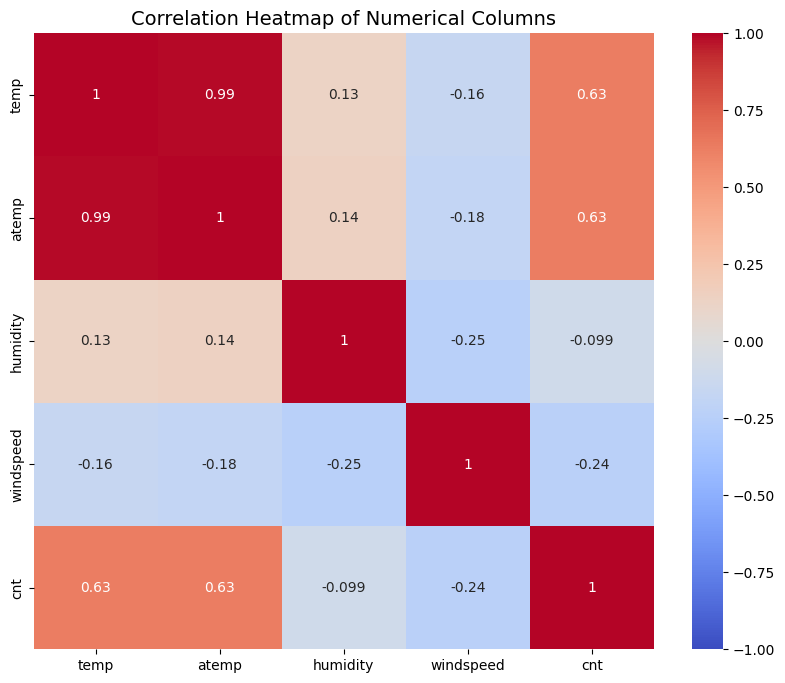

In [1583]:
# Calculate correlation matrix
corr_matrix = input[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns', fontsize=14)
plt.show()

## Prepare the Data


In [1584]:
# Creating dummy variables
dummy_df = pd.get_dummies(input, columns=['season', 'month', 'weekday', 'weathersit'], drop_first=False)

# Identify the dummy variable columns
dummy_cols = dummy_df.columns.difference(input.columns)

# Convert only the dummy variable columns to integers
dummy_df[dummy_cols] = dummy_df[dummy_cols].astype(int)

dummy_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,1,1,0,0


In [1585]:
### Dummy Variables
input_new = dummy_df 

In [1586]:
input_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,1,1,0,0


## Split Data into Training and Test Sets

In [1587]:
# splitting the dataframe into Train and Test

np.random.seed(0)
input_train, input_test = train_test_split(input_new, train_size = 0.7, random_state = 100)
print(input_train.shape)
print(input_test.shape)

(510, 34)
(220, 34)


In [1588]:
# verifying the head of dataset before scaling.

input_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,0,0,0,0,0,0,0,1


In [1589]:
input_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,1,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1590]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [1591]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
input_train[num_vars] = scaler.fit_transform(input_train[num_vars])

In [1592]:
input_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.262745,0.243137,...,0.127451,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.440557,0.429398,...,0.333805,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


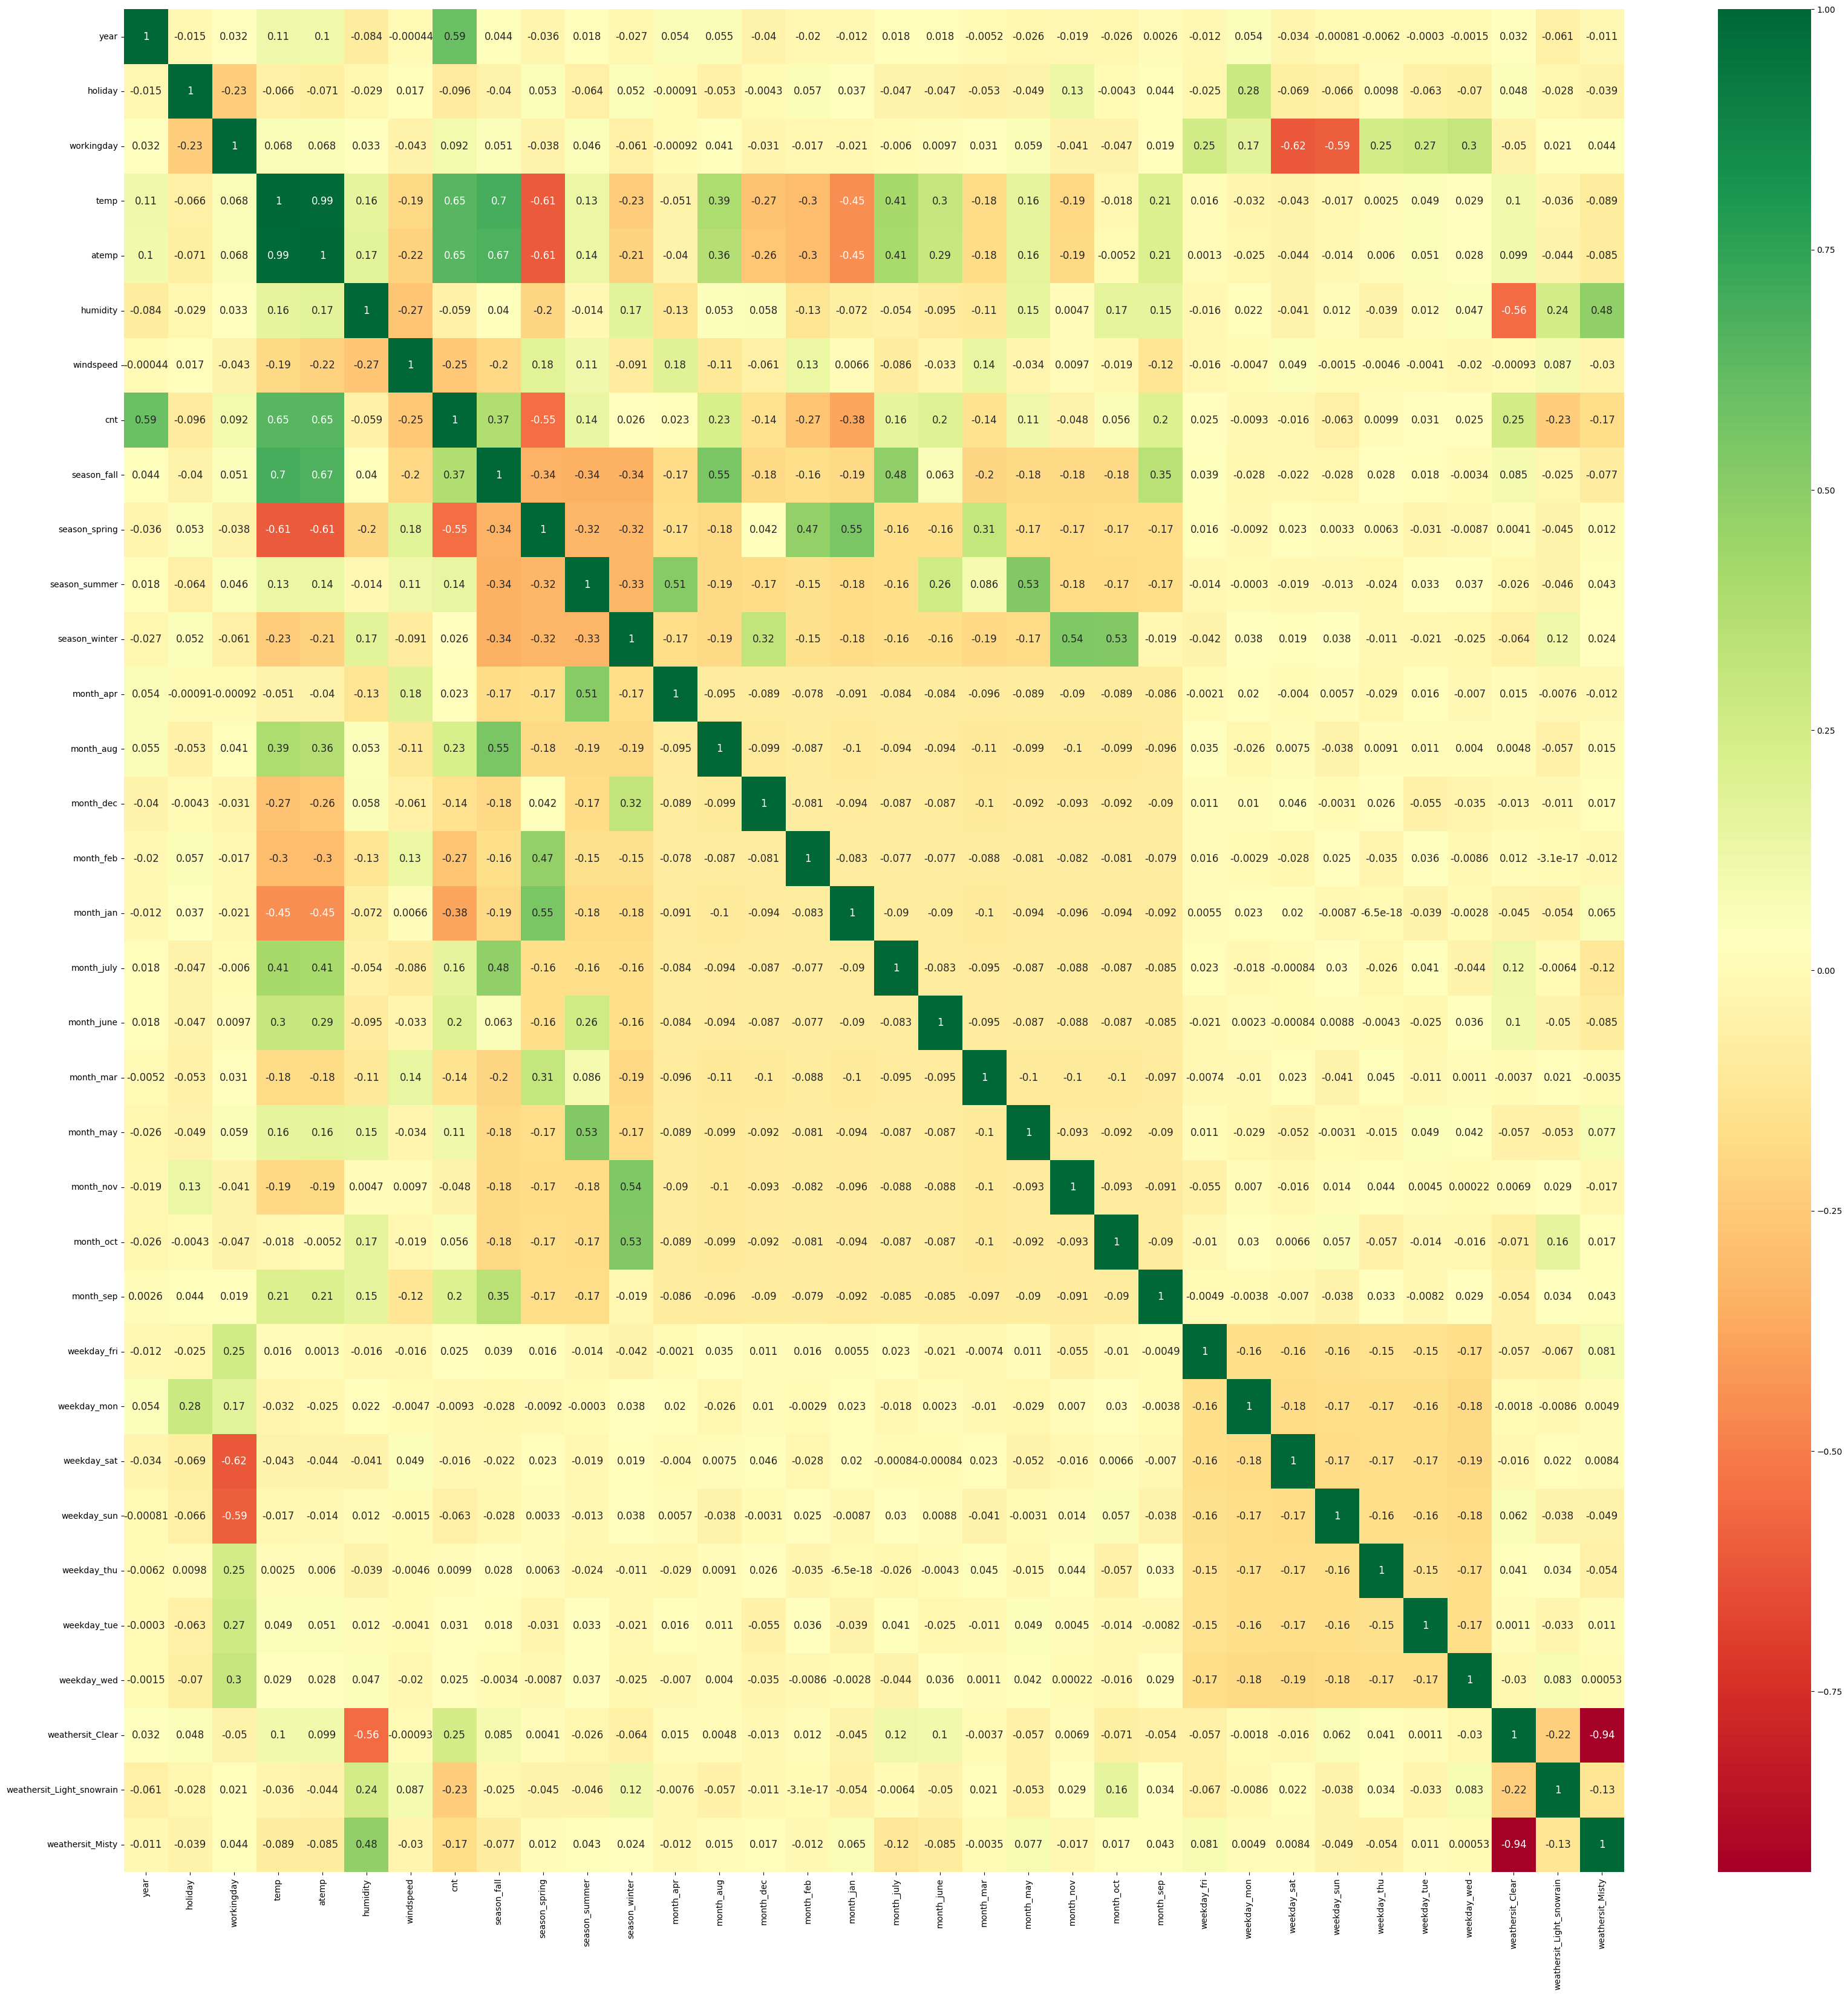

In [1593]:
# check the correlation coefficients to see which variables are highly correlated

fig, ax = plt.subplots(figsize=(40,40))
matrix = np.triu(input_train.corr())
sns.heatmap(input_train.corr(), annot = True, cmap="RdYlGn", ax=ax, annot_kws={"size": 12})
plt.show()

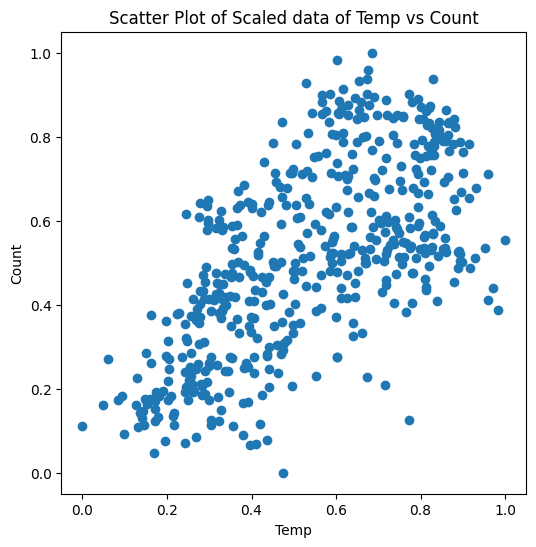

In [1594]:
# Visualizing one of the correlation to see the trends via Scatter plot.
cols=['temp']
for column in cols:
    plt.figure(figsize=[6,6])
    plt.scatter(input_train[column], input_train.cnt)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Scatter Plot of Scaled data of {column.capitalize()} vs Count')
    plt.show()

In [1595]:
input_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,0,0,0,0,0,1


Visualization confirms the positive correlation between temp and cnt.

### Build the MODEL

In [1596]:
y_train = input_train.pop('cnt')
X_train = input_train

In [1597]:
X_train_sm=sm.add_constant(X_train)

# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.81e-180
Time:                        01:07:39   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1107      0.019      5.934      0.000       0.074       0.147
year                          0.2325      0.008     28.794      0.000       0.217       0.248
holiday                      -0.0303      0.020     -1.522      0.129      -0.069       0.009
workingday                    0.0551      0.009      6.091      0.000       0.037       0.073
temp                          0.3880      0.142      2.727      0.007       0.108       0.668
atemp                         0.0590      0.138      0.426      0.670      -0.213       0.331
humidity                     -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                    -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_fall                   0.0016      0.018      0.089      0.929      -0.035       0.038
season_spring                -0.0437      0.016     -2.653      0.008      -0.076      -0.011
season_summer                 0.0440      0.017      2.666      0.008       0.012       0.076
season_winter                 0.1087      0.018      6.008      0.000       0.073       0.144
month_apr                     0.0144      0.021      0.687      0.492      -0.027       0.056
month_aug                     0.0367      0.024      1.543      0.124      -0.010       0.083
month_dec                    -0.0299      0.020     -1.492      0.136      -0.069       0.009
month_feb                    -0.0179      0.023     -0.767      0.444      -0.064       0.028
month_jan                    -0.0487      0.024     -2.024      0.044      -0.096      -0.001
month_july                   -0.0182      0.026     -0.712      0.477      -0.069       0.032
month_june                    0.0204      0.021      0.967      0.334      -0.021       0.062
month_mar                     0.0160      0.017      0.948      0.344      -0.017       0.049
month_may                     0.0400      0.022      1.831      0.068      -0.003       0.083
month_nov                    -0.0254      0.023     -1.107      0.269      -0.070       0.020
month_oct                     0.0221      0.022      0.996      0.320      -0.022       0.066
month_sep                     0.1012      0.020      5.182      0.000       0.063       0.140
weekday_fri                   0.0161      0.010      1.536      0.125      -0.004       0.037
weekday_mon                  -0.0055      0.009     -0.587      0.557      -0.024       0.013
weekday_sat                   0.0701      0.010      6.747      0.000       0.050       0.090
weekday_sun                   0.0158      0.011      1.440      0.150      -0.006       0.037
weekday_thu                   0.0064      0.010      0.622      0.534      -0.014       0.026
weekday_tue                  -0.0024      0.010     -0.224      0.823      

### VIF

In [1598]:
# We will look for Significance (p-value) & VIF of a particular column to check and decide whether to keep that column or not.
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1599]:
calculateVIF(X_train)

,Features,VIF
16,month_july,inf
17,month_june,inf
31,weathersit_Light_snowrain,inf
30,weathersit_Clear,inf
29,weekday_wed,inf
28,weekday_tue,inf
27,weekday_thu,inf
26,weekday_sun,inf
25,weekday_sat,inf
24,weekday_mon,inf


 Drop a column which has:
      1. High P value & High VIF
      2. High & Low:
              a.High p, low VIF
              b.Low p, High VIF
      3. Low p & Low VIF. 

In [1600]:

X_drop=X_train.drop(['weekday_tue','season_fall'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.81e-180
Time:                        01:07:39   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1109      0.025      4.436      0.000       0.062       0.160
year                          0.2325      0.008     28.794      0.000       0.217       0.248
holiday                      -0.0314      0.023     -1.354      0.177      -0.077       0.014
workingday                    0.0540      0.011      4.998      0.000       0.033       0.075
temp                          0.3880      0.142      2.727      0.007       0.108       0.668
atemp                         0.0590      0.138      0.426      0.670      -0.213       0.331
humidity                     -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                    -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring                -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer                 0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter                 0.1071      0.028      3.826      0.000       0.052       0.162
month_apr                     0.0144      0.021      0.683      0.495      -0.027       0.056
month_aug                     0.0367      0.023      1.575      0.116      -0.009       0.083
month_dec                    -0.0298      0.020     -1.475      0.141      -0.070       0.010
month_feb                    -0.0179      0.024     -0.757      0.449      -0.064       0.029
month_jan                    -0.0486      0.024     -2.004      0.046      -0.096      -0.001
month_july                   -0.0182      0.025     -0.723      0.470      -0.068       0.031
month_june                    0.0204      0.021      0.967      0.334      -0.021       0.062
month_mar                     0.0160      0.017      0.929      0.353      -0.018       0.050
month_may                     0.0400      0.022      1.810      0.071      -0.003       0.083
month_nov                    -0.0254      0.023     -1.099      0.272      -0.071       0.020
month_oct                     0.0221      0.022      0.987      0.324      -0.022       0.066
month_sep                     0.1012      0.019      5.297      0.000       0.064       0.139
weekday_fri                   0.0184      0.016      1.184      0.237      -0.012       0.049
weekday_mon                  -0.0032      0.015     -0.208      0.835      -0.033       0.027
weekday_sat                   0.0713      0.012      5.794      0.000       0.047       0.095
weekday_sun                   0.0171      0.013      1.343      0.180      -0.008       0.042
weekday_thu                   0.0087      0.015      0.564      0.573      -0.022       0.039
weekday_wed                   0.0125      0.015      0.851      0.395      -0.016       0.042
weathersit_Clear              0.1418      0.010     13.775      0.000      

In [1601]:
calculateVIF(X_drop)

,Features,VIF
15,month_july,inf
14,month_jan,inf
29,weathersit_Light_snowrain,inf
28,weathersit_Clear,inf
25,weekday_sun,inf
24,weekday_sat,inf
21,month_sep,inf
20,month_oct,inf
19,month_nov,inf
18,month_may,inf


In [1602]:
X_drop=X_drop.drop(['month_apr'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.81e-180
Time:                        01:07:39   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1200      0.030      4.031      0.000       0.062       0.179
year                          0.2325      0.008     28.794      0.000       0.217       0.248
holiday                      -0.0291      0.024     -1.231      0.219      -0.076       0.017
workingday                    0.0562      0.011      4.919      0.000       0.034       0.079
temp                          0.3880      0.142      2.727      0.007       0.108       0.668
atemp                         0.0590      0.138      0.426      0.670      -0.213       0.331
humidity                     -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                    -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring                -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer                 0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter                 0.1071      0.028      3.826      0.000       0.052       0.162
month_aug                     0.0223      0.034      0.657      0.511      -0.044       0.089
month_dec                    -0.0443      0.034     -1.316      0.189      -0.110       0.022
month_feb                    -0.0323      0.033     -0.980      0.327      -0.097       0.032
month_jan                    -0.0631      0.034     -1.876      0.061      -0.129       0.003
month_july                   -0.0327      0.035     -0.931      0.352      -0.102       0.036
month_june                    0.0060      0.025      0.241      0.810      -0.043       0.055
month_mar                     0.0016      0.025      0.063      0.950      -0.047       0.050
month_may                     0.0255      0.021      1.208      0.228      -0.016       0.067
month_nov                    -0.0398      0.036     -1.093      0.275      -0.111       0.032
month_oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
month_sep                     0.0868      0.032      2.711      0.007       0.024       0.150
weekday_fri                   0.0184      0.016      1.184      0.237      -0.012       0.049
weekday_mon                  -0.0032      0.015     -0.208      0.835      -0.033       0.027
weekday_sat                   0.0736      0.013      5.689      0.000       0.048       0.099
weekday_sun                   0.0194      0.013      1.462      0.144      -0.007       0.045
weekday_thu                   0.0087      0.015      0.564      0.573      -0.022       0.039
weekday_wed                   0.0125      0.015      0.851      0.395      -0.016       0.042
weathersit_Clear              0.1448      0.012     12.550      0.000       0.122       0.168
weathersit_Light_snowrain    -0.1101      0.022     -5.051      0.000      

In [1603]:
calculateVIF(X_drop)

,Features,VIF
29,weathersit_Misty,inf
1,holiday,inf
2,workingday,inf
28,weathersit_Light_snowrain,inf
27,weathersit_Clear,inf
23,weekday_sat,inf
24,weekday_sun,inf
3,temp,66.90
4,atemp,56.03
7,season_spring,10.77


In [1604]:
X_drop=X_drop.drop(['atemp'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.00e-181
Time:                        01:07:39   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1199      0.030      4.029      0.000       0.061       0.178
year                          0.2324      0.008     28.819      0.000       0.217       0.248
holiday                      -0.0297      0.024     -1.259      0.209      -0.076       0.017
workingday                    0.0564      0.011      4.940      0.000       0.034       0.079
temp                          0.4454      0.046      9.628      0.000       0.354       0.536
humidity                     -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                    -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring                -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer                 0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                 0.1076      0.028      3.853      0.000       0.053       0.163
month_aug                     0.0204      0.034      0.607      0.544      -0.046       0.086
month_dec                    -0.0443      0.034     -1.317      0.189      -0.110       0.022
month_feb                    -0.0324      0.033     -0.985      0.325      -0.097       0.032
month_jan                    -0.0633      0.034     -1.885      0.060      -0.129       0.003
month_july                   -0.0338      0.035     -0.969      0.333      -0.102       0.035
month_june                    0.0046      0.025      0.186      0.853      -0.044       0.053
month_mar                     0.0013      0.025      0.052      0.959      -0.047       0.050
month_may                     0.0247      0.021      1.173      0.241      -0.017       0.066
month_nov                    -0.0399      0.036     -1.096      0.274      -0.111       0.032
month_oct                     0.0075      0.036      0.210      0.834      -0.063       0.078
month_sep                     0.0859      0.032      2.692      0.007       0.023       0.149
weekday_fri                   0.0179      0.016      1.156      0.248      -0.013       0.048
weekday_mon                  -0.0030      0.015     -0.196      0.844      -0.033       0.027
weekday_sat                   0.0737      0.013      5.705      0.000       0.048       0.099
weekday_sun                   0.0195      0.013      1.473      0.141      -0.007       0.045
weekday_thu                   0.0088      0.015      0.571      0.568      -0.022       0.039
weekday_wed                   0.0124      0.015      0.844      0.399      -0.017       0.041
weathersit_Clear              0.1451      0.012     12.596      0.000       0.122       0.168
weathersit_Light_snowrain    -0.1108      0.022     -5.096      0.000      -0.153      -0.068
weathersit_Misty              0.0855      0.013      6.628      0.000      

In [1605]:
calculateVIF(X_drop)

,Features,VIF
28,weathersit_Misty,inf
23,weekday_sun,inf
2,workingday,inf
27,weathersit_Light_snowrain,inf
26,weathersit_Clear,inf
22,weekday_sat,inf
1,holiday,inf
6,season_spring,10.75
8,season_winter,9.44
7,season_summer,8.27


In [1606]:
X_drop=X_drop.drop(['month_mar','month_june','month_oct'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.53e-184
Time:                        01:07:39   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1217      0.028      4.423      0.000       0.068       0.176
year                          0.2323      0.008     29.032      0.000       0.217       0.248
holiday                      -0.0292      0.023     -1.257      0.209      -0.075       0.016
workingday                    0.0567      0.011      5.131      0.000       0.035       0.078
temp                          0.4487      0.038     11.669      0.000       0.373       0.524
humidity                     -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed                    -0.1862      0.025     -7.313      0.000      -0.236      -0.136
season_spring                -0.0466      0.027     -1.747      0.081      -0.099       0.006
season_summer                 0.0401      0.023      1.722      0.086      -0.006       0.086
season_winter                 0.1096      0.023      4.826      0.000       0.065       0.154
month_aug                     0.0150      0.024      0.633      0.527      -0.031       0.061
month_dec                    -0.0490      0.018     -2.689      0.007      -0.085      -0.013
month_feb                    -0.0344      0.021     -1.602      0.110      -0.077       0.008
month_jan                    -0.0650      0.021     -3.059      0.002      -0.107      -0.023
month_july                   -0.0395      0.025     -1.600      0.110      -0.088       0.009
month_may                     0.0226      0.017      1.307      0.192      -0.011       0.057
month_nov                    -0.0459      0.019     -2.421      0.016      -0.083      -0.009
month_sep                     0.0804      0.021      3.748      0.000       0.038       0.123
weekday_fri                   0.0180      0.015      1.164      0.245      -0.012       0.048
weekday_mon                  -0.0029      0.015     -0.193      0.847      -0.033       0.027
weekday_sat                   0.0742      0.013      5.933      0.000       0.050       0.099
weekday_sun                   0.0200      0.013      1.548      0.122      -0.005       0.045
weekday_thu                   0.0088      0.015      0.575      0.565      -0.021       0.039
weekday_wed                   0.0125      0.015      0.854      0.394      -0.016       0.041
weathersit_Clear              0.1456      0.011     13.362      0.000       0.124       0.167
weathersit_Light_snowrain    -0.1100      0.021     -5.170      0.000      -0.152      -0.068
weathersit_Misty              0.0861      0.012      6.946      0.000       0.062       0.110
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                     

In [1607]:
calculateVIF(X_drop)

,Features,VIF
25,weathersit_Misty,inf
1,holiday,inf
2,workingday,inf
24,weathersit_Light_snowrain,inf
23,weathersit_Clear,inf
20,weekday_sun,inf
19,weekday_sat,inf
6,season_spring,8.55
7,season_summer,6.60
8,season_winter,6.27


In [1608]:
X_drop=X_drop.drop(['weekday_mon','weekday_thu','weekday_wed','month_aug'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.55e-188
Time:                        01:07:39   Log-Likelihood:                 526.01
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1278      0.026      4.944      0.000       0.077       0.179
year                          0.2320      0.008     29.128      0.000       0.216       0.248
holiday                      -0.0299      0.021     -1.411      0.159      -0.071       0.012
workingday                    0.0622      0.009      6.578      0.000       0.044       0.081
temp                          0.4528      0.038     11.853      0.000       0.378       0.528
humidity                     -0.1517      0.038     -4.034      0.000      -0.226      -0.078
windspeed                    -0.1870      0.025     -7.363      0.000      -0.237      -0.137
season_spring                -0.0550      0.022     -2.515      0.012      -0.098      -0.012
season_summer                 0.0302      0.017      1.784      0.075      -0.003       0.063
season_winter                 0.1002      0.018      5.629      0.000       0.065       0.135
month_dec                    -0.0489      0.018     -2.700      0.007      -0.084      -0.013
month_feb                    -0.0349      0.021     -1.631      0.104      -0.077       0.007
month_jan                    -0.0649      0.021     -3.060      0.002      -0.107      -0.023
month_july                   -0.0513      0.018     -2.859      0.004      -0.087      -0.016
month_may                     0.0226      0.017      1.308      0.191      -0.011       0.056
month_nov                    -0.0452      0.019     -2.409      0.016      -0.082      -0.008
month_sep                     0.0726      0.017      4.369      0.000       0.040       0.105
weekday_fri                   0.0133      0.012      1.091      0.276      -0.011       0.037
weekday_sat                   0.0750      0.011      6.635      0.000       0.053       0.097
weekday_sun                   0.0205      0.012      1.721      0.086      -0.003       0.044
weathersit_Clear              0.1470      0.010     14.182      0.000       0.127       0.167
weathersit_Light_snowrain    -0.1068      0.021     -5.086      0.000      -0.148      -0.066
weathersit_Misty              0.0877      0.012      7.409      0.000       0.064       0.111
==============================================================================
Omnibus:                       83.854   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.110
Skew:                          -0.799   Prob(JB):                     2.40e-51
Kurtosis:                       5.901   Cond. No.                     7.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.71e-29. This might indicate that

In [1609]:
calculateVIF(X_drop)

,Features,VIF
21,weathersit_Misty,inf
1,holiday,inf
2,workingday,inf
20,weathersit_Light_snowrain,inf
19,weathersit_Clear,inf
18,weekday_sun,inf
17,weekday_sat,inf
6,season_spring,5.79
3,temp,4.88
8,season_winter,3.88


In [1610]:
X_drop=X_drop.drop(['weathersit_Light_snowrain','weathersit_Clear','weekday_sun','weekday_sat'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          6.58e-170
Time:                        01:07:39   Log-Likelihood:                 476.76
No. Observations:                 510   AIC:                            -915.5
Df Residuals:                     491   BIC:                            -835.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3774      0.041      9.249      0.000       0.297       0.458
year                 0.2318      0.009     26.483      0.000       0.215       0.249
holiday             -0.0725      0.028     -2.546      0.011      -0.128      -0.017
workingday           0.0094      0.010      0.954      0.340      -0.010       0.029
temp                 0.5125      0.041     12.363      0.000       0.431       0.594
humidity            -0.3053      0.038     -8.086      0.000      -0.379      -0.231
windspeed           -0.2312      0.027     -8.427      0.000      -0.285      -0.177
season_spring       -0.0414      0.024     -1.726      0.085      -0.089       0.006
season_summer        0.0387      0.019      2.089      0.037       0.002       0.075
season_winter        0.1019      0.020      5.208      0.000       0.063       0.140
month_dec           -0.0266      0.020     -1.347      0.179      -0.065       0.012
month_feb           -0.0314      0.023     -1.340      0.181      -0.078       0.015
month_jan           -0.0488      0.023     -2.099      0.036      -0.094      -0.003
month_july          -0.0597      0.020     -3.029      0.003      -0.098      -0.021
month_may            0.0300      0.019      1.582      0.114      -0.007       0.067
month_nov           -0.0315      0.021     -1.529      0.127      -0.072       0.009
month_sep            0.0758      0.018      4.148      0.000       0.040       0.112
weekday_fri          0.0176      0.013      1.310      0.191      -0.009       0.044
weathersit_Misty    -0.0242      0.011     -2.258      0.024      -0.045      -0.003
==============================================================================
Omnibus:                      111.075   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.306
Skew:                          -1.012   Prob(JB):                     1.04e-75
Kurtosis:                       6.486   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1611]:
calculateVIF(X_drop)

,Features,VIF
4,humidity,27.05
3,temp,16.95
6,season_spring,5.35
5,windspeed,4.73
8,season_winter,4.04
2,workingday,3.46
7,season_summer,3.30
11,month_jan,2.35
17,weathersit_Misty,2.12
0,year,2.11


In [1612]:
X_drop=X_drop.drop(['month_july','month_sep','month_jan','month_may','month_nov'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          5.31e-165
Time:                        01:07:39   Log-Likelihood:                 452.02
No. Observations:                 510   AIC:                            -876.0
Df Residuals:                     496   BIC:                            -816.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3408      0.038      8.866      0.000       0.265       0.416
year                 0.2313      0.009     25.401      0.000       0.213       0.249
holiday             -0.0678      0.029     -2.308      0.021      -0.126      -0.010
workingday           0.0116      0.010      1.131      0.258      -0.009       0.032
temp                 0.5277      0.037     14.074      0.000       0.454       0.601
humidity            -0.2704      0.039     -6.978      0.000      -0.347      -0.194
windspeed           -0.2293      0.028     -8.092      0.000      -0.285      -0.174
season_spring       -0.0595      0.023     -2.611      0.009      -0.104      -0.015
season_summer        0.0517      0.015      3.461      0.001       0.022       0.081
season_winter        0.0961      0.018      5.234      0.000       0.060       0.132
month_dec           -0.0114      0.018     -0.643      0.520      -0.046       0.023
month_feb           -0.0039      0.021     -0.191      0.849      -0.044       0.036
weekday_fri          0.0168      0.014      1.200      0.231      -0.011       0.044
weathersit_Misty    -0.0233      0.011     -2.084      0.038      -0.045      -0.001
==============================================================================
Omnibus:                       91.348   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.809
Skew:                          -0.863   Prob(JB):                     1.04e-56
Kurtosis:                       6.025   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1613]:
calculateVIF(X_drop)

,Features,VIF
4,humidity,24.38
3,temp,14.12
5,windspeed,4.57
6,season_spring,3.90
2,workingday,3.43
8,season_winter,3.09
7,season_summer,2.20
12,weathersit_Misty,2.10
0,year,2.08
10,month_feb,1.41


In [1614]:
X_drop=X_drop.drop(['month_dec','month_feb'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.58e-167
Time:                        01:07:40   Log-Likelihood:                 451.80
No. Observations:                 510   AIC:                            -879.6
Df Residuals:                     498   BIC:                            -828.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3377      0.038      8.868      0.000       0.263       0.413
year                 0.2313      0.009     25.442      0.000       0.213       0.249
holiday             -0.0673      0.029     -2.296      0.022      -0.125      -0.010
workingday           0.0117      0.010      1.143      0.253      -0.008       0.032
temp                 0.5322      0.037     14.460      0.000       0.460       0.604
humidity            -0.2715      0.039     -7.029      0.000      -0.347      -0.196
windspeed           -0.2284      0.028     -8.096      0.000      -0.284      -0.173
season_spring       -0.0597      0.022     -2.695      0.007      -0.103      -0.016
season_summer        0.0525      0.015      3.535      0.000       0.023       0.082
season_winter        0.0949      0.018      5.206      0.000       0.059       0.131
weekday_fri          0.0165      0.014      1.181      0.238      -0.011       0.044
weathersit_Misty    -0.0230      0.011     -2.063      0.040      -0.045      -0.001
==============================================================================
Omnibus:                       89.388   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.178
Skew:                          -0.848   Prob(JB):                     4.73e-55
Kurtosis:                       5.983   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1615]:
calculateVIF(X_drop)

,Features,VIF
4,humidity,23.94
3,temp,13.87
5,windspeed,4.55
6,season_spring,3.54
2,workingday,3.43
8,season_winter,2.97
7,season_summer,2.20
10,weathersit_Misty,2.10
0,year,2.08
9,weekday_fri,1.24


In [1616]:
X_drop=X_drop.drop(['humidity'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.94e-158
Time:                        01:07:40   Log-Likelihood:                 427.69
No. Observations:                 510   AIC:                            -833.4
Df Residuals:                     499   BIC:                            -786.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1964      0.034      5.799      0.000       0.130       0.263
year                 0.2394      0.009     25.344      0.000       0.221       0.258
holiday             -0.0669      0.031     -2.182      0.030      -0.127      -0.007
workingday           0.0102      0.011      0.953      0.341      -0.011       0.031
temp                 0.4780      0.038     12.682      0.000       0.404       0.552
windspeed           -0.1812      0.029     -6.313      0.000      -0.238      -0.125
season_spring       -0.0720      0.023     -3.114      0.002      -0.117      -0.027
season_summer        0.0448      0.016      2.886      0.004       0.014       0.075
season_winter        0.0690      0.019      3.687      0.000       0.032       0.106
weekday_fri          0.0235      0.015      1.613      0.107      -0.005       0.052
weathersit_Misty    -0.0640      0.010     -6.414      0.000      -0.084      -0.044
==============================================================================
Omnibus:                      119.523   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.500
Skew:                          -1.050   Prob(JB):                     5.96e-91
Kurtosis:                       6.891   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1617]:
calculateVIF(X_drop)

,Features,VIF
4,windspeed,4.53
3,temp,4.49
2,workingday,3.37
5,season_spring,2.11
0,year,2.06
6,season_summer,1.84
7,season_winter,1.66
9,weathersit_Misty,1.52
8,weekday_fri,1.24
1,holiday,1.09


In [1618]:
X_drop=X_drop.drop(['workingday'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          4.26e-159
Time:                        01:07:40   Log-Likelihood:                 427.22
No. Observations:                 510   AIC:                            -834.4
Df Residuals:                     500   BIC:                            -792.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2030      0.033      6.120      0.000       0.138       0.268
year                 0.2397      0.009     25.384      0.000       0.221       0.258
holiday             -0.0736      0.030     -2.464      0.014      -0.132      -0.015
temp                 0.4785      0.038     12.697      0.000       0.404       0.553
windspeed           -0.1821      0.029     -6.349      0.000      -0.238      -0.126
season_spring       -0.0722      0.023     -3.122      0.002      -0.118      -0.027
season_summer        0.0450      0.016      2.900      0.004       0.015       0.075
season_winter        0.0686      0.019      3.668      0.000       0.032       0.105
weekday_fri          0.0270      0.014      1.912      0.056      -0.001       0.055
weathersit_Misty    -0.0638      0.010     -6.399      0.000      -0.083      -0.044
==============================================================================
Omnibus:                      120.371   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.442
Skew:                          -1.070   Prob(JB):                     1.50e-88
Kurtosis:                       6.802   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1619]:
calculateVIF(X_drop)

,Features,VIF
3,windspeed,4.53
2,temp,3.62
0,year,2.06
4,season_spring,1.96
5,season_summer,1.80
6,season_winter,1.59
8,weathersit_Misty,1.52
7,weekday_fri,1.15
1,holiday,1.04


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Residual Analysis

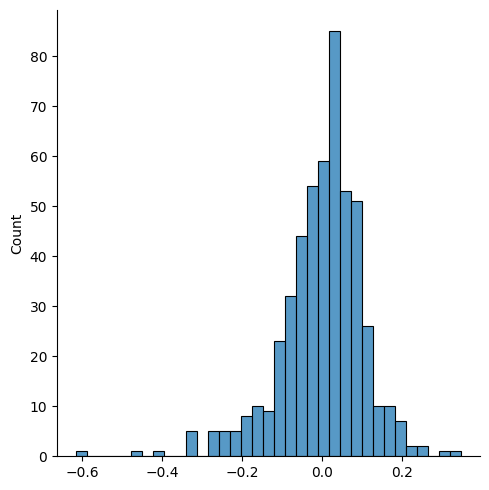

In [1620]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.displot(res)

# Final Model Interpretation

Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

lr_model Coefficients

const	0.203
year	0.2397
holiday	-0.0736
temp	0.4785
windspeed	-0.1821
season_spring	-0.0722
season_summer	0.045
season_winter	0.0686
weekday_fri	0.027
weathersit_Misty	-0.0638


From the lr_model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS.
 
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 199.2
Prob (F-statistic): 4.26e-159
The F-Statistics value of 199 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.



The equation of best fitted surface based on model lr6:¶
cnt = 0.203 + (yr × 0.2397) - (holiday × 0.07) + (temp × 0.4785) − (windspeed × 0.1821) + (season_spring × -0.0722) + (season_summer × 0.045) + (season_winter × 0.0686) + (weekday_fri ×0.027) − (weathersit_Misty × 0.0638).

## Interpretation of Coefficients:


temp: A coefficient value of ‘0.4785’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.4785 units.

weathersit_Misty: A coefficient value of ‘-0.0638’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.0638 units.

year: A coefficient value of ‘0.2397’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2397 units.

season_summer: A coefficient value of ‘0.045’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.045 units.

season_spring: A coefficient value of ‘-0.0722’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.0722 units.

workingday: A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

season_winter: A coefficient value of ‘0.0686’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.0686 units. 

weekday_fri: A coefficient value of ‘0.027’ indicated that a unit increase in weekday_fri variable increases the bike hire numbers by 0.027 units.

holiday: A coefficient value of ‘-0.0736’ indicated that, a unit increase in holiday variable, decreases the bike hire numbers by 0.0736 units.

const: The Constant value of ‘0.203’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.203 units.

# Predictions and Evaluatinng on the Test Set

In [1621]:
input_test.head()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
input_test[num_vars] = scaler.transform(input_test[num_vars])
input_test.head()
input_test.describe()
Y_test=input_test.pop('cnt')
X_test=input_test
# add a constant
x_test_sm = sm.add_constant(X_test)
x_test_sm.head()
X_train_sm.columns
x_test_sm=x_test_sm.drop(['weekday_tue','atemp','season_fall','month_apr','month_mar','month_june','month_oct','weekday_mon','weekday_thu','weekday_wed','month_aug','month_july','month_sep','month_jan','month_dec','month_feb','month_may','month_nov','workingday', 'humidity' , 'weathersit_Light_snowrain','weathersit_Clear','weekday_sun','weekday_sat'],axis=1)
x_test_sm.columns
#Predict
y_test_pred=lr_model.predict(x_test_sm)


0.7772462164390221

### R^2 Value for TEST

In [ ]:
r2_score(y_true=Y_test,y_pred=y_test_pred)

# The value we got is 0.777 which is similar to that of the trained set i.e. 0.78.

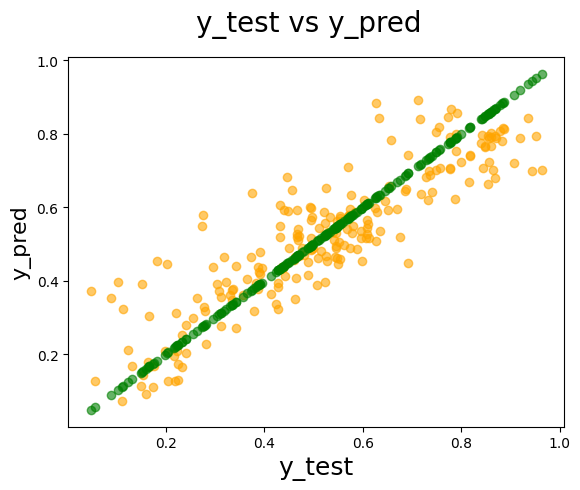

In [1628]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, y_test_pred, alpha=0.6, c='orange', label='Predicted')  # Color the predicted data points blue
plt.scatter(Y_test, Y_test, alpha=0.6, c='green', label='Actual')           # Color the actual data points red (for comparison)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [1629]:
# Get the shape of X_test
X_test.shape

(220, 33)

In [1630]:
# n is number of rows in X
r2=0.7772462164390221
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7377253838717519

#### Final Results


Test R^2 :0.820
Test Adjusted R^2 :0.812

# Final Report

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.4785’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4785 units.


season_spring (season_spring) - A coefficient value of ‘-0.0722’ indicated that, a unit increase in season_spring variable decreases the bike hire numbers by 0.3070 units.


Year (yr) - A coefficient value of ‘0.2397’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2397 units.


So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking.